# Understanding Supervised Learning

_Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs_

![Image](../images/ml_map.jpg)

## Before we start:

- __Data exploration:__ 

Shape, Descriptive statistics (numeric, categorical, timestamp), Visualization, Domain knowledge 

- __Data transformations:__ 

Arbitrary, Modeling (joins, feature eng.), Performance (outliers, scaling, encoding)

![Image](https://media.giphy.com/media/ZThQqlxY5BXMc/giphy.gif)

In [1]:
# Imports

import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
# Read data

file = '../data/baseball_1000K_ko.csv'
data = pd.read_csv(file)
data.head()

,time,distance,speed
0,0.417502,18.39,44.544863
1,0.444243,18.39,41.913224
2,0.501641,18.39,36.272173
3,0.462009,18.39,39.643463
4,0.487902,18.39,37.327581


In [3]:
# Shape
data.shape

(1000000, 3)

In [4]:
# Descriptive statistics

data.describe()

,time,distance,speed
count,1000000.000000,1.000000e+06,1000000.000000
mean,0.457535,1.839000e+01,39.921724
std,0.030773,2.574084e-10,2.561189
min,0.391554,1.839000e+01,35.799885
25%,0.431967,1.839000e+01,37.676556
50%,0.457564,1.839000e+01,39.754674
75%,0.483121,1.839000e+01,42.089555
max,0.523625,1.839000e+01,44.700061


'../data/baseball_1000K_ko.csv'

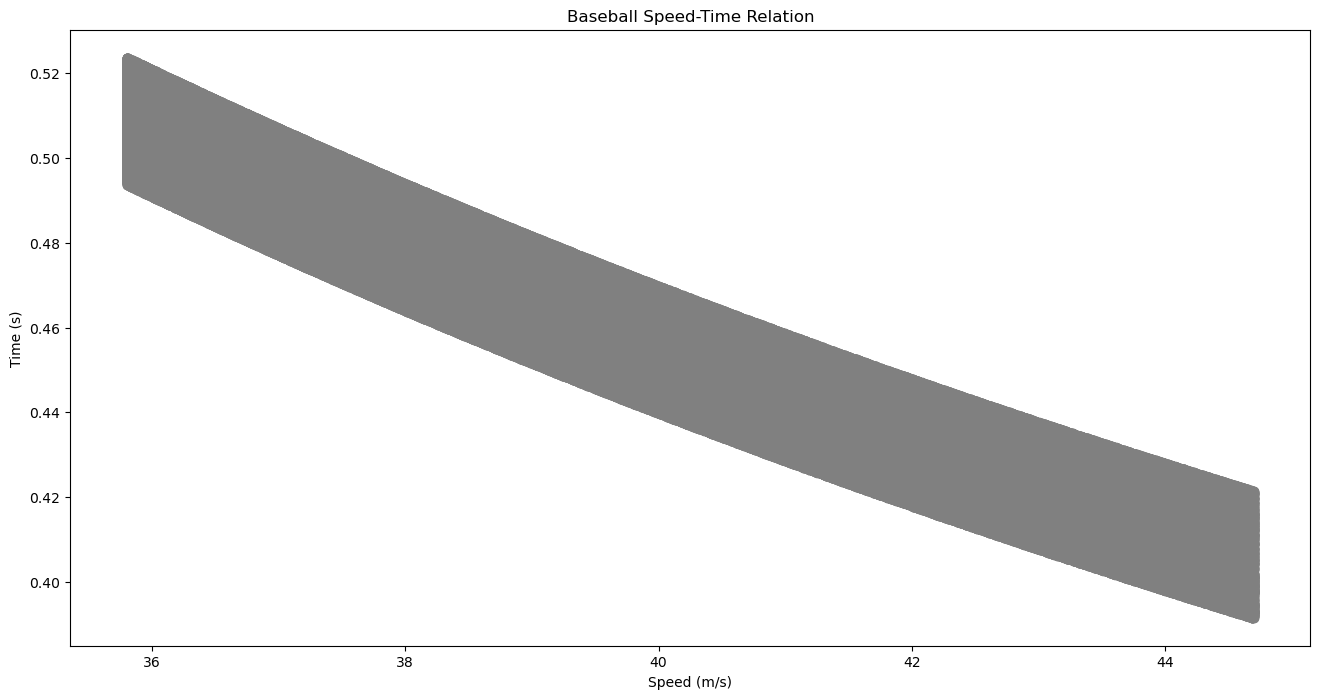

In [5]:
# Visualization

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,8))
ax.set(xlabel='Speed (m/s)', 
       ylabel='Time (s)',
       title='Baseball Speed-Time Relation')
ax.scatter(data['speed'], data['time'], c='grey')
file

### Domain knowledge

![Image](../images/velocity.png)

![Image](https://media.giphy.com/media/l0HlIJQUdby5FzlZe/giphy.gif)

In [6]:
# Features and predictions

X = data[['time','distance']]
y = data['speed']
print(X.shape,y.shape)

(1000000, 2) (1000000,)


In [7]:
X

,time,distance
0,0.417502,18.39
1,0.444243,18.39
2,0.501641,18.39
3,0.462009,18.39
4,0.487902,18.39
...,...,...
999995,0.488819,18.39
999996,0.446323,18.39
999997,0.399659,18.39
999998,0.481368,18.39


In [8]:
y

0         44.544863
1         41.913224
2         36.272173
3         39.643463
4         37.327581
            ...    
999995    36.954524
999996    40.191340
999997    44.050856
999998    38.516964
999999    42.277956
Name: speed, Length: 1000000, dtype: float64

---

## Train-Test Split:

![Image](../images/train-test-split.jpg)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
print(f"X_train: {type(X_train)}, X_test: {type(X_test)}, y_train: {type(y_train)}, y_test: {type(y_test)}")

X_train: (800000, 2), X_test: (200000, 2), y_train: (800000,), y_test: (200000,)
X_train: <class 'pandas.core.frame.DataFrame'>, X_test: <class 'pandas.core.frame.DataFrame'>, y_train: <class 'pandas.core.series.Series'>, y_test: <class 'pandas.core.series.Series'>


In [10]:
X_train.describe()

,time,distance
count,800000.000000,8.000000e+05
mean,0.457530,1.839000e+01
std,0.030773,1.727544e-10
min,0.391554,1.839000e+01
25%,0.431956,1.839000e+01
50%,0.457553,1.839000e+01
75%,0.483121,1.839000e+01
max,0.523625,1.839000e+01


In [11]:
y_train.describe()

count    800000.000000
mean         39.922078
std           2.561350
min          35.799885
25%          37.677486
50%          39.755913
75%          42.090004
max          44.700061
Name: speed, dtype: float64

In [12]:
X_test.describe()

,time,distance
count,200000.000000,2.000000e+05
mean,0.457556,1.839000e+01
std,0.030772,3.030117e-11
min,0.391592,1.839000e+01
25%,0.432017,1.839000e+01
50%,0.457606,1.839000e+01
75%,0.483119,1.839000e+01
max,0.523477,1.839000e+01


In [13]:
y_test.describe()

count    200000.000000
mean         39.920308
std           2.560552
min          35.799926
25%          37.672165
50%          39.749469
75%          42.088538
max          44.700030
Name: speed, dtype: float64

---

## Models

![Image](../images/models.png)

### _Linear Regression (test-in-training)_ 

In [14]:
%%time

# Model definition

model = LinearRegression()
print(type(model))

<class 'sklearn.linear_model._base.LinearRegression'>
CPU times: total: 0 ns
Wall time: 0 ns


In [15]:
%%time

# Model training

weights = model.fit(X, y)
print(type(weights))

<class 'sklearn.linear_model._base.LinearRegression'>
CPU times: total: 297 ms
Wall time: 78 ms


In [16]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

<class 'numpy.ndarray'>
CPU times: total: 0 ns
Wall time: 3.97 ms


In [17]:
# RMSE

tricky_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {tricky_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

Speed predictions error is: +/- 0.73385 m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)


### _Linear Regression (the-real-stuff)_ 

In [18]:
%%time

# Model definition

model = LinearRegression()
print(type(model))

<class 'sklearn.linear_model._base.LinearRegression'>
CPU times: total: 0 ns
Wall time: 0 ns


In [19]:
%%time

# Model training

weights = model.fit(X_train, y_train)
print(type(weights))

<class 'sklearn.linear_model._base.LinearRegression'>
CPU times: total: 500 ms
Wall time: 56.6 ms


In [20]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

<class 'numpy.ndarray'>
CPU times: total: 0 ns
Wall time: 3.14 ms


In [21]:
# RMSE

real_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {real_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

Speed predictions error is: +/- 0.73385 m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)


In [22]:
# RMSE comparison

print(f"The real_error is {round(real_error/tricky_error, 2)} times the tricky_error")

The real_error is 1.0 times the tricky_error


---

### _Random Forest Regressor (test-in-training)_ 

In [23]:
%%time

# Model definition

model = RandomForestRegressor()
print(type(model))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
CPU times: total: 0 ns
Wall time: 0 ns


In [24]:
%%time

# Model training

weights = model.fit(X, y)
print(type(weights))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
CPU times: total: 6min 10s
Wall time: 6min 9s


In [25]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

<class 'numpy.ndarray'>
CPU times: total: 10.9 s
Wall time: 10.9 s


In [26]:
# RMSE

tricky_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {tricky_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

Speed predictions error is: +/- 0.54072 m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)


### _Random Forest Regressor (the-real-stuff)_ 

In [27]:
%%time

# Model definition

model = RandomForestRegressor()
print(type(model))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
CPU times: total: 0 ns
Wall time: 998 µs


In [28]:
%%time

# Model training

weights = model.fit(X_train, y_train)
print(type(weights))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
CPU times: total: 4min 7s
Wall time: 4min 7s


In [29]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

<class 'numpy.ndarray'>
CPU times: total: 9.84 s
Wall time: 9.94 s


In [30]:
# RMSE

real_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {real_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

Speed predictions error is: +/- 0.80965 m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)


In [31]:
# RMSE comparison

print(f"The real_error is {round(real_error/tricky_error, 2)} times the tricky_error")

The real_error is 1.5 times the tricky_error


---